In [1]:
import pandas as pd
from datetime import timedelta
import numpy as np

from matplotlib import cm
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "dejavuserif"

In [2]:
from sklearn.neural_network import MLPRegressor

# Admissions Predictors

In [3]:
df = pd.read_csv('data.csv',  index_col=0, parse_dates=[0])

In [4]:
df

,admissions,discharges,occupancy,day,holiday,temp,feels_like,temp_min,temp_max
2014-04-03,12.0,4.0,8.0,3,0.0,0.236667,-4.625000,-1.404583,2.335417
2014-04-04,11.0,9.0,10.0,4,0.0,2.353929,-3.518214,-0.639286,4.970714
2014-04-05,12.0,1.0,21.0,5,0.0,2.683571,-5.528214,1.019643,4.161786
2014-04-06,8.0,3.0,26.0,6,0.0,0.907917,-4.641250,-1.264583,3.205417
2014-04-07,17.0,15.0,28.0,0,0.0,3.793750,-0.637917,0.904167,7.858333
...,...,...,...,...,...,...,...,...,...
2019-03-27,15.0,19.0,111.0,2,0.0,-0.729167,-5.525833,-2.935000,1.388750
2019-03-28,17.0,21.0,107.0,3,0.0,4.163333,-1.817500,1.362500,7.126250
2019-03-29,16.0,20.0,103.0,4,0.0,5.317083,1.726667,3.033333,7.530417
2019-03-30,17.0,10.0,110.0,5,0.0,3.933750,-0.053437,-0.351250,7.706563


In [5]:
admissions_predictors = pd.DataFrame(df['admissions'])

In [6]:
admissions_predictors['lf_admissions'] = admissions_predictors['admissions'].rolling(7, win_type=None).mean()
admissions_predictors['hf_admissions'] = admissions_predictors['admissions']-admissions_predictors['lf_admissions']
admissions_predictors['day'] = np.sin(2*np.pi*df['day'].values/6)
admissions_predictors['holiday'] = df['holiday']
admissions_predictors['temp_min']= df['temp_min']
admissions_predictors['temp_max']= df['temp_max']
admissions_predictors['temp'] = df['temp']
admissions_predictors['feels_like']=df['feels_like']
admissions_predictors = admissions_predictors.dropna()
admissions_predictors

,admissions,lf_admissions,hf_admissions,day,holiday,temp_min,temp_max,temp,feels_like
2014-04-09,15.0,12.714286,2.285714,8.660254e-01,0.0,1.533750,4.711667,3.203333,-2.495000
2014-04-10,11.0,12.571429,-1.571429,1.224647e-16,0.0,3.385833,8.899167,6.213750,1.190833
2014-04-11,12.0,12.714286,-0.714286,-8.660254e-01,0.0,5.794167,11.271667,8.695000,4.766250
2014-04-12,16.0,13.285714,2.714286,-8.660254e-01,0.0,2.817083,9.627917,6.085417,2.690833
2014-04-13,10.0,13.571429,-3.571429,-2.449294e-16,0.0,8.250833,15.542083,12.088333,9.122917
...,...,...,...,...,...,...,...,...,...
2019-03-27,15.0,16.285714,-1.285714,8.660254e-01,0.0,-2.935000,1.388750,-0.729167,-5.525833
2019-03-28,17.0,15.714286,1.285714,1.224647e-16,0.0,1.362500,7.126250,4.163333,-1.817500
2019-03-29,16.0,15.571429,0.428571,-8.660254e-01,0.0,3.033333,7.530417,5.317083,1.726667
2019-03-30,17.0,16.142857,0.857143,-8.660254e-01,0.0,-0.351250,7.706563,3.933750,-0.053437


## Low Frequency Admission Predictors

In [7]:
lag = 4
y = admissions_predictors['admissions'].iloc[lag:].values
admissions_lf_dict = {}

for i in range(len(admissions_predictors)-lag):
    admissions_lf_dict[i] = admissions_predictors['lf_admissions'].iloc[i:i+lag+1].values

In [8]:
lf_predictors = pd.DataFrame(admissions_lf_dict).T
lf_y = lf_predictors[lag].values #the target values
lf_predictors = lf_predictors.drop([lag], axis=1)

derivative = lf_predictors.apply(np.gradient, axis=1, result_type='expand')

lag_column_names = []
dlag_column_names = []
for i in range(lag):
    string = 'lag_'+str(i)
    dstring = 'dlag_'+str(i)
    lag_column_names = np.append(lag_column_names, string) 
    dlag_column_names = np.append(dlag_column_names, string)    

lf_predictors.columns = lag_column_names
derivative.columns = dlag_column_names

In [9]:
lf_predictors['mean'] = lf_predictors.mean(numeric_only=True, axis=1)
lf_predictors['std'] = lf_predictors.std(numeric_only=True, axis=1)
lf_predictors['max'] = lf_predictors.max(numeric_only=True, axis=1)
lf_predictors['min'] = lf_predictors.min(numeric_only=True, axis=1)

derivative['dmean'] = derivative.mean(numeric_only=True, axis=1)
derivative['dstd'] = derivative.std(numeric_only=True, axis=1)
derivative['dmax'] = derivative.std(numeric_only=True, axis=1)
derivative['dmin'] = derivative.std(numeric_only=True, axis=1)

In [10]:
lf_predictors = pd.concat([lf_predictors, derivative], axis=1, sort=False)
lf_predictors

,lag_0,lag_1,lag_2,lag_3,mean,std,max,min,lag_0,lag_1,lag_2,lag_3,dmean,dstd,dmax,dmin
0,12.714286,12.571429,12.714286,13.285714,12.821429,0.274327,13.285714,0.274327,-0.142857,0.000000,0.357143,0.571429,1.964286e-01,0.282910,0.255494,0.233843
1,12.571429,12.714286,13.285714,13.571429,13.035714,0.408769,13.571429,0.408769,0.142857,0.357143,0.428571,0.285714,3.035714e-01,0.105644,0.124329,0.126243
2,12.714286,13.285714,13.571429,12.714286,13.071429,0.371154,13.571429,0.371154,0.571429,0.428571,-0.285714,-0.857143,-3.571429e-02,0.574767,0.571315,0.555404
3,13.285714,13.571429,12.714286,13.000000,13.142857,0.319438,13.571429,0.319438,0.285714,-0.285714,-0.285714,0.285714,-2.220446e-16,0.285714,0.280912,0.271173
4,13.571429,12.714286,13.000000,13.571429,13.214286,0.371154,13.571429,0.371154,-0.857143,-0.285714,0.428571,0.571429,-3.571429e-02,0.574767,0.571315,0.555404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1809,15.857143,16.428571,16.571429,16.000000,16.214286,0.294508,16.571429,0.294508,0.571429,0.357143,-0.214286,-0.571429,3.571429e-02,0.453163,0.439693,0.420813
1810,16.428571,16.571429,16.000000,16.285714,16.321429,0.211289,16.571429,0.211289,0.142857,-0.214286,-0.142857,0.285714,1.785714e-02,0.204384,0.198033,0.189357
1811,16.571429,16.000000,16.285714,15.714286,16.142857,0.319438,16.571429,0.319438,-0.571429,-0.142857,-0.142857,-0.571429,-3.571429e-01,0.214286,0.301921,0.348393
1812,16.000000,16.285714,15.714286,15.571429,15.892857,0.274327,16.285714,0.274327,0.285714,-0.142857,-0.357143,-0.142857,-8.928571e-02,0.233512,0.246959,0.249440


## High Frequency Admission Predictors

In [11]:
len(admissions_predictors)
lag = 4
admissions_hf_dict = {}
min_temp_hf_dict = {}
max_temp_hf_dict = {}
mean_temp_hf_dict = {}
feels_like_hf_dict = {}

dayofweek_hf = admissions_predictors['day'].iloc[lag:].values
holidays_hf = admissions_predictors['holiday'].iloc[lag:].values

for i in range(len(admissions_predictors)-lag):
    admissions_hf_dict[i] = admissions_predictors['hf_admissions'].iloc[i:i+lag+1].values
    
    min_temp_hf_dict[i] = admissions_predictors['temp_min'].iloc[i:i+lag+1].values
    max_temp_hf_dict[i] = admissions_predictors['temp_max'].iloc[i:i+lag+1].values
    mean_temp_hf_dict[i] = admissions_predictors['temp'].iloc[i:i+lag+1].values
    feels_like_hf_dict[i] = admissions_predictors['feels_like'].iloc[i:i+lag+1].values

In [12]:
weather_1 = pd.DataFrame(min_temp_hf_dict).T
weather_2 = pd.DataFrame(max_temp_hf_dict).T
weather_3 = pd.DataFrame(mean_temp_hf_dict).T
weather_4 = pd.DataFrame(feels_like_hf_dict).T

In [13]:
hf_predictors = pd.DataFrame(admissions_hf_dict).T
hf_y = hf_predictors[lag].values #the target values
hf_predictors = hf_predictors.drop([lag], axis=1)

derivative = hf_predictors.apply(np.gradient, axis=1, result_type='expand')

lag_column_names = []
dlag_column_names = []
for i in range(lag):
    string = 'lag_'+str(i)
    dstring = 'dlag_'+str(i)
    lag_column_names = np.append(lag_column_names, string) 
    dlag_column_names = np.append(dlag_column_names, string)    

hf_predictors.columns = lag_column_names
derivative.columns = dlag_column_names

In [14]:
hf_predictors['mean'] = hf_predictors.mean(numeric_only=True, axis=1)
hf_predictors['std'] = hf_predictors.std(numeric_only=True, axis=1)
hf_predictors['max'] = hf_predictors.max(numeric_only=True, axis=1)
hf_predictors['min'] = hf_predictors.min(numeric_only=True, axis=1)

derivative['dmean'] = derivative.mean(numeric_only=True, axis=1)
derivative['dstd'] = derivative.std(numeric_only=True, axis=1)
derivative['dmax'] = derivative.std(numeric_only=True, axis=1)
derivative['dmin'] = derivative.std(numeric_only=True, axis=1)

In [15]:
hf_predictors = pd.concat([hf_predictors, derivative], axis=1, sort=False)
hf_predictors['day'] = dayofweek_hf
hf_predictors['holiday'] = holidays_hf
hf_predictors =  pd.concat([hf_predictors, weather_1, weather_2, weather_3, weather_4], axis=1, sort=False)

In [16]:
hf_predictors

,lag_0,lag_1,lag_2,lag_3,mean,std,max,min,lag_0,lag_1,...,0,1,2,3,4,0,1,2,3,4
0,2.285714,-1.571429,-0.714286,2.714286,0.678571,1.852673,2.714286,-1.571429,-3.857143,-1.500000,...,3.203333,6.213750,8.695000,6.085417,12.088333,-2.495000,1.190833,4.766250,2.690833,9.122917
1,-1.571429,-0.714286,2.714286,-3.571429,-0.785714,2.271159,2.714286,-3.571429,0.857143,2.142857,...,6.213750,8.695000,6.085417,12.088333,14.343600,1.190833,4.766250,2.690833,9.122917,11.744000
2,-0.714286,2.714286,-3.571429,-1.714286,-0.821429,2.284319,2.714286,-3.571429,3.428571,-1.428571,...,8.695000,6.085417,12.088333,14.343600,5.943846,4.766250,2.690833,9.122917,11.744000,2.388974
3,2.714286,-3.571429,-1.714286,3.000000,0.107143,2.829103,3.000000,-3.571429,-6.285714,-2.214286,...,6.085417,12.088333,14.343600,5.943846,-3.042917,2.690833,9.122917,11.744000,2.388974,-9.871667
4,-3.571429,-1.714286,3.000000,5.428571,0.785714,3.594923,5.428571,-3.571429,1.857143,3.285714,...,12.088333,14.343600,5.943846,-3.042917,1.147083,9.122917,11.744000,2.388974,-9.871667,-3.768333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1809,-2.857143,-1.428571,0.428571,0.000000,-0.964286,1.291159,1.291159,-2.857143,1.428571,1.642857,...,-2.747857,1.753750,-2.319583,-2.332500,-0.729167,-11.056071,-4.178750,-8.739167,-8.605000,-5.525833
1810,-1.428571,0.428571,0.000000,-1.285714,-0.571429,0.801784,0.801784,-1.428571,1.857143,0.714286,...,1.753750,-2.319583,-2.332500,-0.729167,4.163333,-4.178750,-8.739167,-8.605000,-5.525833,-1.817500
1811,0.428571,0.000000,-1.285714,1.285714,0.107143,0.927884,1.285714,-1.285714,-0.428571,-0.857143,...,-2.319583,-2.332500,-0.729167,4.163333,5.317083,-8.739167,-8.605000,-5.525833,-1.817500,1.726667
1812,0.000000,-1.285714,1.285714,0.428571,0.107143,0.927884,1.285714,-1.285714,-1.285714,0.642857,...,-2.332500,-0.729167,4.163333,5.317083,3.933750,-8.605000,-5.525833,-1.817500,1.726667,-0.053437


# Forecasting

## Low Frequency

In [17]:
l=len(y)
f = 0.9

X_lf = lf_predictors.values

X_lf_train = X_lf[0:int(f*l)]
X_lf_test = X_lf[int(f*l):]
y_lf_train = lf_y[0:int(f*l)]
y_lf_test = lf_y[int(f*l):]

y_test = y[int(f*l):]

In [18]:
model_lf = MLPRegressor(activation='relu',solver='lbfgs', alpha=1,
                    hidden_layer_sizes=(350, 350), random_state=1,
                    max_iter=1000)

In [19]:
model_lf.fit(X_lf_train, y_lf_train)

MLPRegressor(activation='relu', alpha=1, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(350, 350), learning_rate='constant',
             learning_rate_init=0.001, max_iter=1000, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [20]:
y_lf_forecast = model_lf.predict(X_lf_test)

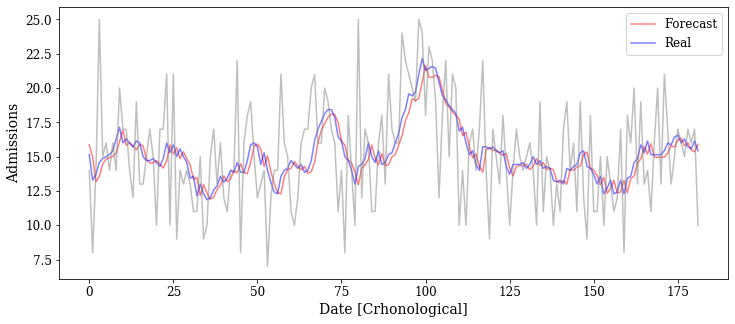

In [21]:
plt.figure(figsize=(12,5))

plt.plot(y_lf_forecast, color='red', alpha=0.5, label='Forecast')
plt.plot(y_lf_test, color='blue', alpha=0.5, label='Real')

plt.plot(y_test, color='gray', alpha=0.5)


plt.ylabel('Admissions', fontsize=14)
plt.xlabel('Date [Crhonological]', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='best', fontsize=12)
plt.savefig('forecasting_lf.png', bbox='tight')
plt.show()

## High Frequency

In [178]:
X_hf = hf_predictors.values

X_hf_train = X_hf[0:int(f*l)]
X_hf_test = X_hf[int(f*l):]
y_hf_train = hf_y[0:int(f*l)]
y_hf_test = hf_y[int(f*l):]

In [179]:
model_hf = MLPRegressor(activation='relu',solver='lbfgs', alpha=1,
                    hidden_layer_sizes=(100, 100), random_state=1,
                    max_iter=500)

In [185]:
y_hf_forecast = np.array([])
y_hf_ub = np.array([])
y_hf_lb = np.array([])

X_aux = X_hf_train
y_aux = y_hf_train

for i in range(len(y_hf_test)):
    l_aux = X_aux.shape[0]
    aux_forecast = np.array([])
    model_hf.fit(X_aux, y_aux)
    forecast = model_hf.predict(X_hf_test[i].reshape(1,-1))
        
    y_hf_forecast = np.append(y_hf_forecast, forecast)

    X_aux = np.append(X_hf_train, [X_hf_test[i]], axis=0)
    y_aux = np.append(y_hf_train, y_hf_test[i])

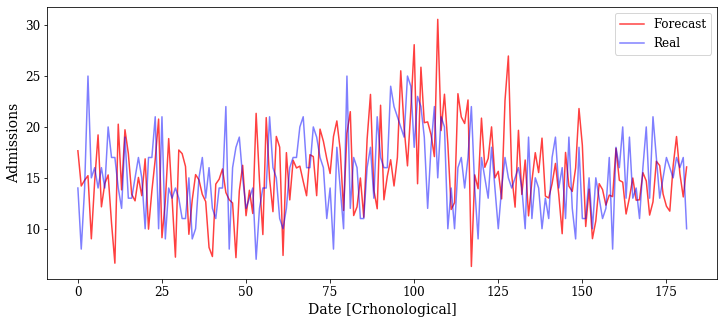

In [189]:
plt.figure(figsize=(12,5))

plt.plot(y_hf_forecast+y_lf_forecast, color='red', alpha=0.75, label='Forecast')
plt.plot(y_test, color='blue', alpha=0.5, label='Real')


plt.ylabel('Admissions', fontsize=14)
plt.xlabel('Date [Crhonological]', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='best', fontsize=12)
plt.savefig('forecasting.png', bbox='tight')
plt.show()

## Everything at once

In [180]:
model_hf.fit(X_hf_train, y_hf_train)

MLPRegressor(activation='relu', alpha=1, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100, 100), learning_rate='constant',
             learning_rate_init=0.001, max_iter=500, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [181]:
forecast = model_hf.predict(X_hf_test)

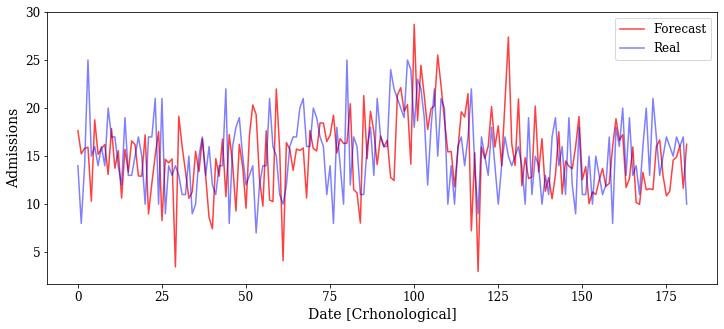

In [184]:
plt.figure(figsize=(12,5))

plt.plot(forecast+y_lf_forecast, color='red', alpha=0.75, label='Forecast')
plt.plot(y_test, color='blue', alpha=0.5, label='Real')


plt.ylabel('Admissions', fontsize=14)
plt.xlabel('Date [Crhonological]', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='best', fontsize=12)
plt.savefig('forecasting.png', bbox='tight')
plt.show()